In [1]:
import numpy as np
import matplotlib.pyplot 

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
X_tr, X_te, y_tr, y_te = train_test_split(digits.data, digits.target, test_size=0.2)

In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
resultats = list()

# Régression logistique

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
%%time
for penalite in ('l2', None):
    lr = LogisticRegression(penalty=penalite, max_iter=10000, solver="lbfgs")
    resultats.append(("LogisticRegression", f"penalty={penalite}", cross_val_score(lr, X_tr, y_tr).mean()))
    
resultats

CPU times: total: 26.5 s
Wall time: 4.42 s


[('LogisticRegression', 'penalty=l2', 0.9666013356562138),
 ('LogisticRegression', 'penalty=None', 0.9519913859852884)]

# Plus proches voisins

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
%%time
for nb_voisins in range(2, 15):
    knc = KNeighborsClassifier(n_neighbors=nb_voisins)
    resultats.append(("KNeighborsClassifier", f"n_neighbors={nb_voisins}", cross_val_score(knc, X_tr, y_tr).mean()))

CPU times: total: 1min 17s
Wall time: 7.05 s


In [12]:
resultats

[('LogisticRegression', 'penalty=l2', 0.9666013356562138),
 ('LogisticRegression', 'penalty=None', 0.9519913859852884),
 ('KNeighborsClassifier', 'n_neighbors=2', 0.9784238288811459),
 ('KNeighborsClassifier', 'n_neighbors=3', 0.9819129887727449),
 ('KNeighborsClassifier', 'n_neighbors=4', 0.9819057297715833),
 ('KNeighborsClassifier', 'n_neighbors=5', 0.9846883468834688),
 ('KNeighborsClassifier', 'n_neighbors=6', 0.981910569105691),
 ('KNeighborsClassifier', 'n_neighbors=7', 0.9833042973286876),
 ('KNeighborsClassifier', 'n_neighbors=8', 0.9812112853271391),
 ('KNeighborsClassifier', 'n_neighbors=9', 0.9812064459930314),
 ('KNeighborsClassifier', 'n_neighbors=10', 0.9770349399922571),
 ('KNeighborsClassifier', 'n_neighbors=11', 0.9770276809910957),
 ('KNeighborsClassifier', 'n_neighbors=12', 0.9749419279907083),
 ('KNeighborsClassifier', 'n_neighbors=13', 0.9756387921022067),
 ('KNeighborsClassifier', 'n_neighbors=14', 0.9735506194347657)]

# Bayesien Naïf

In [13]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [14]:
gnb = GaussianNB()
resultats.append(("GaussianNB", "", cross_val_score(gnb, X_tr, y_tr).mean()))

In [15]:
mnb = MultinomialNB()
resultats.append(("MultinomialNB", "", cross_val_score(mnb, X_tr, y_tr).mean()))

In [16]:
resultats

[('LogisticRegression', 'penalty=l2', 0.9666013356562138),
 ('LogisticRegression', 'penalty=None', 0.9519913859852884),
 ('KNeighborsClassifier', 'n_neighbors=2', 0.9784238288811459),
 ('KNeighborsClassifier', 'n_neighbors=3', 0.9819129887727449),
 ('KNeighborsClassifier', 'n_neighbors=4', 0.9819057297715833),
 ('KNeighborsClassifier', 'n_neighbors=5', 0.9846883468834688),
 ('KNeighborsClassifier', 'n_neighbors=6', 0.981910569105691),
 ('KNeighborsClassifier', 'n_neighbors=7', 0.9833042973286876),
 ('KNeighborsClassifier', 'n_neighbors=8', 0.9812112853271391),
 ('KNeighborsClassifier', 'n_neighbors=9', 0.9812064459930314),
 ('KNeighborsClassifier', 'n_neighbors=10', 0.9770349399922571),
 ('KNeighborsClassifier', 'n_neighbors=11', 0.9770276809910957),
 ('KNeighborsClassifier', 'n_neighbors=12', 0.9749419279907083),
 ('KNeighborsClassifier', 'n_neighbors=13', 0.9756387921022067),
 ('KNeighborsClassifier', 'n_neighbors=14', 0.9735506194347657),
 ('GaussianNB', '', 0.8476166279519939),
 ('

# Support Vecteur

In [17]:
from sklearn.svm import SVC

In [18]:
%%time
for c in np.linspace(0.03, 1.0, 20):
    svc = SVC(C=c)
    resultats.append(("SVC", f"C={c}", cross_val_score(svc, X_tr, y_tr, n_jobs=-1).mean()))

CPU times: total: 6.98 s
Wall time: 6.27 s


# Réseau de Neurones

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

In [23]:
# On va scaler l'entrée car les réseaux de neurones y sont très sensibles
mms = MinMaxScaler()
mms.fit(X_tr)
X_trs = mms.transform(X_tr)

In [69]:
for n in range(5, 30, 5):
    print(f"{n=}: {65 * n + n + 1}")

n=5: 331
n=10: 661
n=15: 991
n=20: 1321
n=25: 1651


In [24]:
for n1 in (5, 10, 15):
    for n2 in (5, 10, 15):
        print(f"{n1=}, {n2=} -> {65 * n1 + (n1 + 1) * n2 + (n2 + 1)}")

n1=5, n2=5 -> 361
n1=5, n2=10 -> 396
n1=5, n2=15 -> 431
n1=10, n2=5 -> 711
n1=10, n2=10 -> 771
n1=10, n2=15 -> 831
n1=15, n2=5 -> 1061
n1=15, n2=10 -> 1146
n1=15, n2=15 -> 1231


In [26]:
%%time
# Pour l'architecture, garder en tête le nombre de paramètres du modèle 
# par rapport à la taille de l'échantillon
for alpha in (10 ** (-i) for i in range(1, 8)):
    for architecture in ((10,), (15,), (20,), (25,), (5, 5), (10, 10), (15, 15)):
        print(f"hidden_layer_sizes={architecture}, alpha={alpha}")
        mpl = MLPClassifier(hidden_layer_sizes=architecture, alpha=alpha, max_iter=1000)
        resultats.append(
            (
                "MLPClassifier", 
                f"hidden_layer_sizes={architecture}, alpha={alpha}", 
                cross_val_score(mpl, X_trs, y_tr, n_jobs=-1).mean()
            )
        )

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_m

CPU times: total: 28min 37s
Wall time: 5min 41s


# Forêt aléatoire

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
%%time
for estimateurs in range(20, 150, 10):
    rfc = RandomForestClassifier(n_estimators=estimateurs)
    resultats.append(
        (
            "RandomForestClassifier", 
            f"n_estimators={estimateurs}", 
            cross_val_score(rfc, X_tr, y_tr, n_jobs=-1).mean()
        )
    )



CPU times: total: 141 ms
Wall time: 12.9 s


# Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
%%time
for estimateurs in range(20, 150, 10):
    gbc = GradientBoostingClassifier(n_estimators=estimateurs) 
    resultats.append(
        (
            "GradientBoostingClassifier", 
            f"n_estimators={estimateurs}", 
            cross_val_score(gbc, X_tr, y_tr, n_jobs=-1).mean()
        )
    )


CPU times: total: 109 ms
Wall time: 45.9 s


# Synthèse

In [32]:
resultats

[('LogisticRegression', 'penalty=l2', 0.9666013356562138),
 ('LogisticRegression', 'penalty=None', 0.9519913859852884),
 ('KNeighborsClassifier', 'n_neighbors=2', 0.9784238288811459),
 ('KNeighborsClassifier', 'n_neighbors=3', 0.9819129887727449),
 ('KNeighborsClassifier', 'n_neighbors=4', 0.9819057297715833),
 ('KNeighborsClassifier', 'n_neighbors=5', 0.9846883468834688),
 ('KNeighborsClassifier', 'n_neighbors=6', 0.981910569105691),
 ('KNeighborsClassifier', 'n_neighbors=7', 0.9833042973286876),
 ('KNeighborsClassifier', 'n_neighbors=8', 0.9812112853271391),
 ('KNeighborsClassifier', 'n_neighbors=9', 0.9812064459930314),
 ('KNeighborsClassifier', 'n_neighbors=10', 0.9770349399922571),
 ('KNeighborsClassifier', 'n_neighbors=11', 0.9770276809910957),
 ('KNeighborsClassifier', 'n_neighbors=12', 0.9749419279907083),
 ('KNeighborsClassifier', 'n_neighbors=13', 0.9756387921022067),
 ('KNeighborsClassifier', 'n_neighbors=14', 0.9735506194347657),
 ('GaussianNB', '', 0.8476166279519939),
 ('

## Exercice

Faire une meilleure présentation de `resultats`.

In [35]:
sorted(resultats, key=lambda triplet: triplet[2], reverse=True)

[('SVC', 'C=0.846842105263158', 0.9888671118854045),
 ('SVC', 'C=1.0', 0.9888671118854045),
 ('SVC', 'C=0.8978947368421053', 0.9881702477739063),
 ('SVC', 'C=0.9489473684210527', 0.9881702477739063),
 ('SVC', 'C=0.7447368421052633', 0.98677651955091),
 ('SVC', 'C=0.7957894736842106', 0.98677651955091),
 ('SVC', 'C=0.5915789473684211', 0.9860844947735192),
 ('SVC', 'C=0.6426315789473684', 0.9860820751064654),
 ('SVC', 'C=0.6936842105263158', 0.9860820751064654),
 ('SVC', 'C=0.5405263157894737', 0.9853876306620208),
 ('SVC', 'C=0.4894736842105263', 0.9846931862175763),
 ('KNeighborsClassifier', 'n_neighbors=5', 0.9846883468834688),
 ('KNeighborsClassifier', 'n_neighbors=7', 0.9833042973286876),
 ('SVC', 'C=0.43842105263157893', 0.9833018776616337),
 ('KNeighborsClassifier', 'n_neighbors=3', 0.9819129887727449),
 ('KNeighborsClassifier', 'n_neighbors=6', 0.981910569105691),
 ('KNeighborsClassifier', 'n_neighbors=4', 0.9819057297715833),
 ('SVC', 'C=0.3873684210526316', 0.9812161246612465)

## Exercice

Explorer visuellement la répartition des scores par modèles.

In [37]:
import pandas as pd

In [36]:
import seaborn as sns

In [52]:
def abbrev(resultat):
    nom, params, score = resultat
    if nom == "KNeighborsClassifier":
        abbr = "KNC"
    elif nom == "MLPClassifier":
        abbr = "MPL"
    elif nom == "GaussianNB":
        abbr = "GNB"
    elif nom == "GradientBoostingClassifier":
        abbr = "GBC"
    elif nom == "RandomForestClassifier":
        abbr = "RFC"
    elif nom == "SVC":
        abbr = "SVC"
    elif nom == "MultinomialNB":
        abbr = "MNB"
    elif nom == "LogisticRegression":
        abbr = "LR"
    return nom, abbr, params, score 

In [57]:
df = pd.DataFrame(
    data=[abbrev(resultat) for resultat in resultats], 
    columns=["nom", "abbreviation", "parametres", "score"]
)
df = df.astype({"nom": "category", "abbreviation": "category"})
df.dtypes

In [58]:
df.sort_values(by="score", ascending=False)

,nom,abbreviation,parametres,score
36,SVC,SVC,C=1.0,0.988867
33,SVC,SVC,C=0.846842105263158,0.988867
34,SVC,SVC,C=0.8978947368421053,0.988170
35,SVC,SVC,C=0.9489473684210527,0.988170
32,SVC,SVC,C=0.7957894736842106,0.986777
...,...,...,...,...
62,MLPClassifier,MPL,"hidden_layer_sizes=(5, 5), alpha=0.0001",0.894217
41,MLPClassifier,MPL,"hidden_layer_sizes=(5, 5), alpha=0.1",0.885211
48,MLPClassifier,MPL,"hidden_layer_sizes=(5, 5), alpha=0.01",0.881664
15,GaussianNB,GNB,,0.847617


<Axes: xlabel='abbreviation', ylabel='score'>

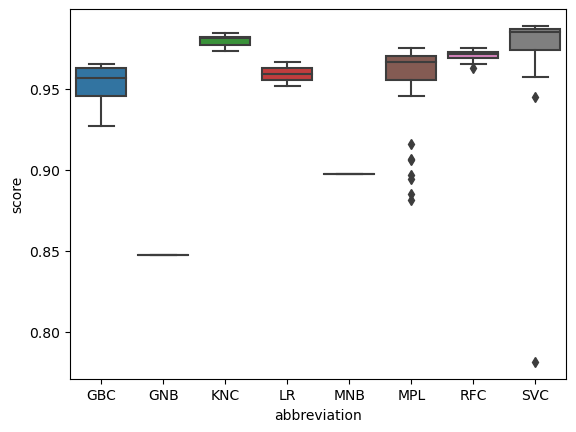

In [59]:
sns.boxplot(data=df, x="abbreviation", y="score", )

**CONCLUSION** on remarque

- pour les random forest, l'hyperparamètres choisi n'a que peu d'impact, on pourrait jouer sur d'autres hyperparamètres
- pour les SVC on a des outliers il peut être pertinent de les identifier pour recalibrer la gamme de paramètre
- pour les MLP on a là aussi des outliers on peut adapter les choix d'hyperparamètres

# Ajustement SVC

In [64]:
df.loc[df["abbreviation"] == "SVC"].sort_values(by="score", ascending=False)

,nom,abbreviation,parametres,score
36,SVC,SVC,C=1.0,0.988867
33,SVC,SVC,C=0.846842105263158,0.988867
35,SVC,SVC,C=0.9489473684210527,0.988170
34,SVC,SVC,C=0.8978947368421053,0.988170
32,SVC,SVC,C=0.7957894736842106,0.986777
31,SVC,SVC,C=0.7447368421052633,0.986777
28,SVC,SVC,C=0.5915789473684211,0.986084
30,SVC,SVC,C=0.6936842105263158,0.986082
29,SVC,SVC,C=0.6426315789473684,0.986082
27,SVC,SVC,C=0.5405263157894737,0.985388


In [68]:
%%time
for c in np.linspace(1.0, 1.5, 20):
    svc = SVC(C=c)
    resultats.append(("SVC", f"C={c}", cross_val_score(svc, X_tr, y_tr, n_jobs=-1).mean()))

CPU times: total: 219 ms
Wall time: 1.13 s


# Ajustement Gradient Boosting

In [66]:
df.loc[df["abbreviation"] == "GBC"].sort_values(by="score", ascending=False)

,nom,abbreviation,parametres,score
111,GradientBoostingClassifier,GBC,n_estimators=140,0.965210
110,GradientBoostingClassifier,GBC,n_estimators=130,0.965210
108,GradientBoostingClassifier,GBC,n_estimators=110,0.963122
109,GradientBoostingClassifier,GBC,n_estimators=120,0.963122
106,GradientBoostingClassifier,GBC,n_estimators=90,0.961726
107,GradientBoostingClassifier,GBC,n_estimators=100,0.961029
105,GradientBoostingClassifier,GBC,n_estimators=80,0.956850
104,GradientBoostingClassifier,GBC,n_estimators=70,0.955461
103,GradientBoostingClassifier,GBC,n_estimators=60,0.954067
102,GradientBoostingClassifier,GBC,n_estimators=50,0.945715


In [67]:
%%time
for estimateurs in range(100, 150, 10):
    for ss in (0.5, 0.8, 0.9):
        gbc = GradientBoostingClassifier(n_estimators=estimateurs, ) 
        resultats.append(
            (
                "GradientBoostingClassifier", 
                f"n_estimators={estimateurs}", 
                cross_val_score(gbc, X_tr, y_tr, n_jobs=-1).mean()
            )
        )


CPU times: total: 156 ms
Wall time: 1min 28s


# Ajustement Random Forest

In [65]:
df.loc[df["abbreviation"] == "RFC"].sort_values(by="score", ascending=False)

,nom,abbreviation,parametres,score
95,RandomForestClassifier,RFC,n_estimators=110,0.974944
91,RandomForestClassifier,RFC,n_estimators=70,0.974250
92,RandomForestClassifier,RFC,n_estimators=80,0.974245
89,RandomForestClassifier,RFC,n_estimators=50,0.972861
98,RandomForestClassifier,RFC,n_estimators=140,0.972162
97,RandomForestClassifier,RFC,n_estimators=130,0.972157
96,RandomForestClassifier,RFC,n_estimators=120,0.971467
94,RandomForestClassifier,RFC,n_estimators=100,0.971465
88,RandomForestClassifier,RFC,n_estimators=40,0.969382
93,RandomForestClassifier,RFC,n_estimators=90,0.969379


# Ajustement Réseaux de Neurones

In [63]:
df.loc[df["abbreviation"] == "MPL"].sort_values(by="score", ascending=False)

,nom,abbreviation,parametres,score
40,MLPClassifier,MPL,"hidden_layer_sizes=(25,), alpha=0.1",0.974952
46,MLPClassifier,MPL,"hidden_layer_sizes=(20,), alpha=0.01",0.974944
39,MLPClassifier,MPL,"hidden_layer_sizes=(20,), alpha=0.1",0.974262
81,MLPClassifier,MPL,"hidden_layer_sizes=(20,), alpha=1e-07",0.972179
82,MLPClassifier,MPL,"hidden_layer_sizes=(25,), alpha=1e-07",0.972171
73,MLPClassifier,MPL,"hidden_layer_sizes=(15,), alpha=1e-06",0.971472
61,MLPClassifier,MPL,"hidden_layer_sizes=(25,), alpha=0.0001",0.970783
67,MLPClassifier,MPL,"hidden_layer_sizes=(20,), alpha=1e-05",0.970780
53,MLPClassifier,MPL,"hidden_layer_sizes=(20,), alpha=0.001",0.970778
66,MLPClassifier,MPL,"hidden_layer_sizes=(15,), alpha=1e-05",0.970773


In [70]:
%%time
for alpha in (10 ** (-i) for i in range(1, 8)):
    for architecture in ((30,), (20, 15), (20, 20)):
        print(f"hidden_layer_sizes={architecture}, alpha={alpha}")
        mpl = MLPClassifier(hidden_layer_sizes=architecture, alpha=alpha, max_iter=1000)
        resultats.append(
            (
                "MLPClassifier", 
                f"hidden_layer_sizes={architecture}, alpha={alpha}", 
                cross_val_score(mpl, X_trs, y_tr, n_jobs=-1).mean()
            )
        )

hidden_layer_sizes=(30,), alpha=0.1
hidden_layer_sizes=(20, 15), alpha=0.1
hidden_layer_sizes=(20, 20), alpha=0.1
hidden_layer_sizes=(30,), alpha=0.01
hidden_layer_sizes=(20, 15), alpha=0.01
hidden_layer_sizes=(20, 20), alpha=0.01
hidden_layer_sizes=(30,), alpha=0.001
hidden_layer_sizes=(20, 15), alpha=0.001
hidden_layer_sizes=(20, 20), alpha=0.001
hidden_layer_sizes=(30,), alpha=0.0001
hidden_layer_sizes=(20, 15), alpha=0.0001
hidden_layer_sizes=(20, 20), alpha=0.0001
hidden_layer_sizes=(30,), alpha=1e-05
hidden_layer_sizes=(20, 15), alpha=1e-05
hidden_layer_sizes=(20, 20), alpha=1e-05
hidden_layer_sizes=(30,), alpha=1e-06
hidden_layer_sizes=(20, 15), alpha=1e-06
hidden_layer_sizes=(20, 20), alpha=1e-06
hidden_layer_sizes=(30,), alpha=1e-07
hidden_layer_sizes=(20, 15), alpha=1e-07
hidden_layer_sizes=(20, 20), alpha=1e-07
CPU times: total: 156 ms
Wall time: 25 s


# Sélection du meilleur modèle

In [71]:
df = pd.DataFrame(
    data=[abbrev(resultat) for resultat in resultats], 
    columns=["nom", "abbreviation", "parametres", "score"]
)
df = df.astype({"nom": "category", "abbreviation": "category"})

<Axes: xlabel='abbreviation', ylabel='score'>

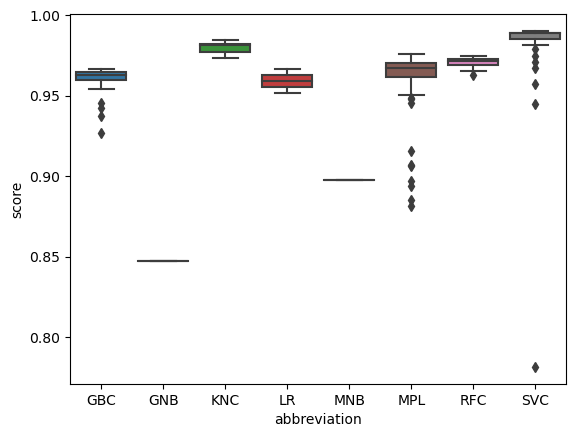

In [72]:
sns.boxplot(data=df, x="abbreviation", y="score")

In [73]:
df.sort_values(by="score", ascending=False)

,nom,abbreviation,parametres,score
142,SVC,SVC,C=1.3947368421052633,0.990258
141,SVC,SVC,C=1.368421052631579,0.990258
138,SVC,SVC,C=1.2894736842105263,0.989564
139,SVC,SVC,C=1.3157894736842106,0.989564
137,SVC,SVC,C=1.263157894736842,0.989564
...,...,...,...,...
62,MLPClassifier,MPL,"hidden_layer_sizes=(5, 5), alpha=0.0001",0.894217
41,MLPClassifier,MPL,"hidden_layer_sizes=(5, 5), alpha=0.1",0.885211
48,MLPClassifier,MPL,"hidden_layer_sizes=(5, 5), alpha=0.01",0.881664
15,GaussianNB,GNB,,0.847617


In [74]:
meilleur = SVC(C=1.39)
meilleur.fit(X_tr, y_tr)

SVC(C=1.39)

In [75]:
meilleur.score(X_tr, y_tr)

0.9972164231036882

In [76]:
meilleur.score(X_te, y_te)

0.9888888888888889

Pas de surapprentissage constaté.
On peut utiliser en production.